# Plotting topomaps and video for preconscious augmentation paper

In [1]:
import pandas as pd
import scipy.io
import mne

from bci_funcs import *

In [2]:
pID = 2
pID = 'sub-0' + "%02d" % (pID)
path = '/Volumes/projects/Lukas_Gehrke/2021-fastReach/data/study/eeglab2python/'

chans = pd.read_csv(path+pID+'/sel_chans_names.csv')        
channel_labels = chans['Var1'].values.tolist()
channel_labels = channel_labels[0:-1]
eog_ix = channel_labels.index('VEOG')
chans_types = ['eeg'] * channel_labels.__len__()
chans_types[eog_ix] = 'eog'
info = mne.create_info(channel_labels, ch_types=chans_types, sfreq=250)
easycap_montage = mne.channels.make_standard_montage('easycap-M1')

pre_move = scipy.io.loadmat(path+pID+'/pre_move.mat')
pre_move = pre_move['pre_move'].mean(axis=2)
pre_move = pre_move.T - pre_move[:,0:24].mean(axis=1)
pre_move = pre_move[25:,:].T

raw = mne.EvokedArray(pre_move, info, tmin=-.996)
raw.set_montage(easycap_montage)
# raw.set_eeg_reference('average', projection=False)

<Evoked | '' (average, N=1), -0.996 – 0 sec, baseline off, 64 ch, ~215 kB>

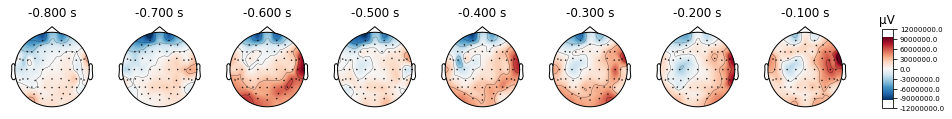

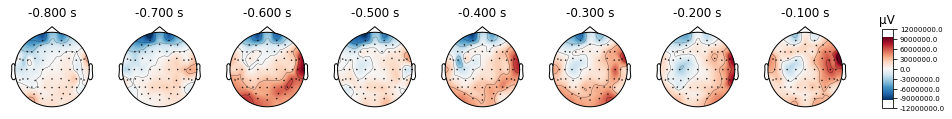

In [3]:
times = np.arange(-.8, 0, 0.1)
raw.plot_topomap(times, ch_type='eeg', time_unit='s', show_names=False)

Initializing animation...
Initializing animation...


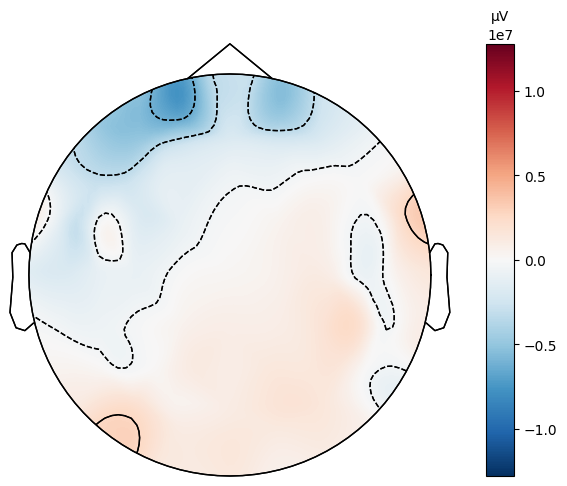

In [4]:
fig, anim = raw.animate_topomap(
    times=times, ch_type='eeg', frame_rate=2, blit=True)